In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mlflow

In [6]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
# import pandas as pd
# import mysql.connector
# import os

# # List of CSV files and their corresponding table names
# csv_files = [
#     ('customers.csv', 'customers'),
#     ('geolocation.csv', 'geolocation'),
#     ('order_items.csv', 'order_items'),
#     ('orders.csv', 'orders'),
#     ('payments.csv', 'payments'),
#     ('products.csv', 'products'),
#     ('sellers.csv', 'sellers'),
#       # Added payments.csv for specific handling
# ]

# # Connect to the MySQL database
# conn = mysql.connector.connect(
#     host='localhost',
#     user='root',
#     password='mysqlabs31.com',
#     database='ecommerce'
# )
# cursor = conn.cursor()

# # Folder containing the CSV files
# folder_path = 'G:/Data Science Project/Ecommerce Python+SQL/Datasets'

# def get_sql_type(dtype):
#     if pd.api.types.is_integer_dtype(dtype):
#         return 'INT'
#     elif pd.api.types.is_float_dtype(dtype):
#         return 'FLOAT'
#     elif pd.api.types.is_bool_dtype(dtype):
#         return 'BOOLEAN'
#     elif pd.api.types.is_datetime64_any_dtype(dtype):
#         return 'DATETIME'
#     else:
#         return 'TEXT'

# for csv_file, table_name in csv_files:
#     file_path = os.path.join(folder_path, csv_file)
    
#     # Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Replace NaN with None to handle SQL NULL
#     df = df.where(pd.notnull(df), None)
    
#     # Debugging: Check for NaN values
#     print(f"Processing {csv_file}")
#     print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

#     # Clean column names
#     df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

#     # Generate the CREATE TABLE statement with appropriate data types
#     columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
#     create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
#     cursor.execute(create_table_query)

#     # Insert DataFrame data into the MySQL table
#     for _, row in df.iterrows():
#         # Convert row to tuple and handle NaN/None explicitly
#         values = tuple(None if pd.isna(x) else x for x in row)
#         sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
#         cursor.execute(sql, values)

#     # Commit the transaction for the current CSV file
#     conn.commit()

# # Close the connection
# conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing geolocation.csv
NaN values before replacement:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered

In [8]:
pip install seaborn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host = "localhost",
    username = "root",
    password = "mysqlabs31.com",
    database = "ecommerce"
)

cur = db.cursor()

# Basic Queries

## 1. List all unique cities where customers are located.

In [10]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


## 2. Count the number of orders placed in 2017.

In [11]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total order placed in 2017 are", data[0][0]

('total order placed in 2017 are', 45101)

## 3. Find the total sales per category.

In [12]:
query = """ select upper(products.product_category), round(sum(payments.payment_value),2)
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by products.product_category; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["CATEGORY", "TOTAL_SALES"])
df.head()

,CATEGORY,TOTAL_SALES
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33


## 4. Calculate the percentage of orders that were paid in installments.

In [13]:
query = """ select (sum(case when payments.payment_installments >= 1 then 1 else 0 end)/count(*))*100 from payments; """

cur.execute(query)

data = cur.fetchall()

"The percentage of orders that were paid in installments is", data[0]

('The percentage of orders that were paid in installments is',
 (Decimal('99.9981'),))

## 5. Count the number of customers from each state. 

In [14]:
query = """ select  customer_state, count(customer_id) from customers
group by customer_state
order by count(customer_id) desc; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["States", "Customer_Count"])
df.head()

,States,Customer_Count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


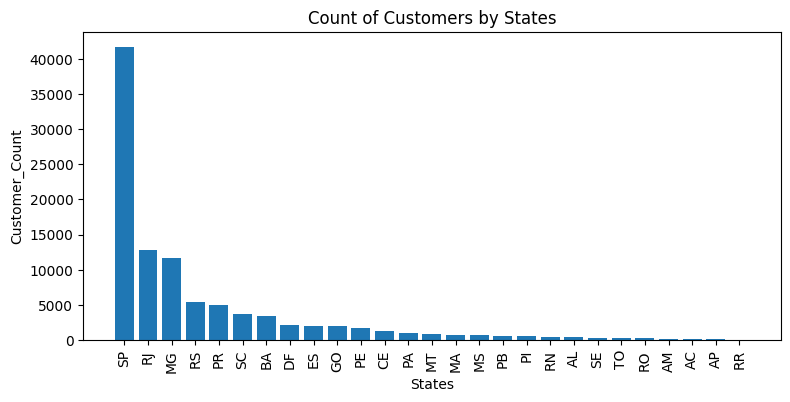

In [15]:
plt.figure(figsize = (9,4))
plt.bar(df["States"], df["Customer_Count"])
plt.xlabel("States")
plt.ylabel("Customer_Count")
plt.title("Count of Customers by States")
plt.xticks(rotation = 90)
plt.show()

## Intermediate Queries

### 1. Calculate the number of orders per month in 2018.

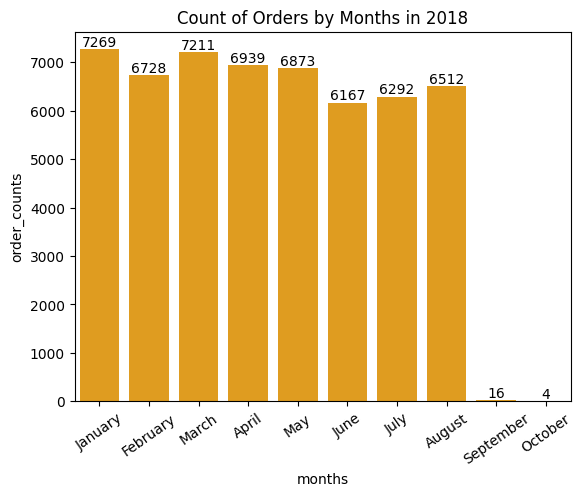

In [16]:
query = """ select monthname(order_purchase_timestamp) as months, count(order_id) as orders
from orders
where year(order_purchase_timestamp) = 2018
group by months; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_counts"])

o = ["January", "February", "March", "April", "May","June", "July", "August", "September", "October"]

ax = sns.barplot(x = df["months"], y = df["order_counts"], data = df, order = o, color = "orange")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=35)
plt.title("Count of Orders by Months in 2018")
plt.show()

### 2. Find the average number of products per order, grouped by customer city.

In [17]:
query = """ with count_per_order as (
select orders.order_id, orders.customer_id, count(order_items.order_item_id) as oc
from orders join order_items 
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id
)

select customers.customer_city, round(avg(count_per_order.oc),2) as average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
order by average_orders desc; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customers_city", "Average_orders"])

df.head(10)

,Customers_city,Average_orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


### 3. Calculate the percentage of total revenue contributed by each product category.

In [18]:
query = """ select upper(products.product_category) as Category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as Total_Sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by products.product_category
order by Total_Sales DESC; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Parcentage_Total_Revenue"])

df

,Category,Parcentage_Total_Revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


### 4. Identify the correlation between product price and the number of times a product has been purchased.

In [19]:
query = """ select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Order_Count", "Price"])

arr1 = df["Order_Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1, arr2])

print("The Correlation is", a[0][1])

The Correlation is -0.10631514167157562


### 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [20]:
query = """ select *, dense_rank() over(order by revenue desc) as ranks from
(select order_items.seller_id, 
sum(payments.payment_value) as revenue
from payments join order_items
on payments.order_id = order_items.order_id
group by order_items.seller_id) as a; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Seller_ID", "Revenue", "Rank"])

df

,Seller_ID,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


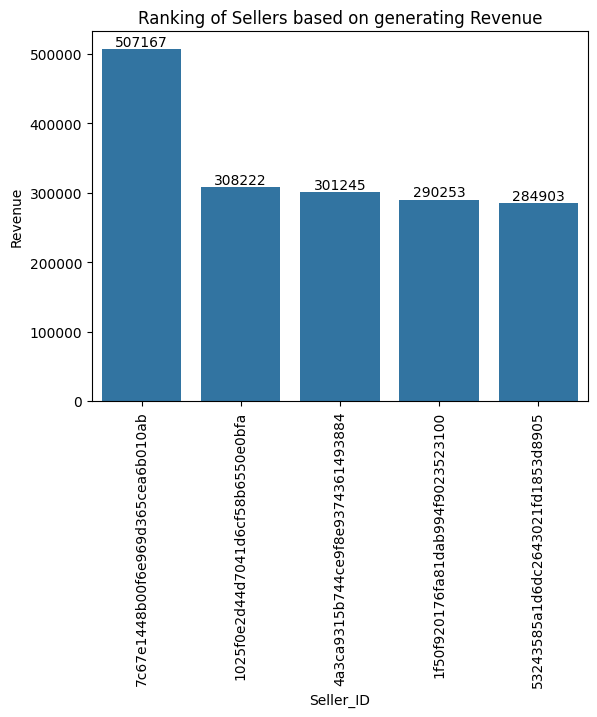

In [21]:
df = df.head(5)

ax = sns.barplot(x = df["Seller_ID"], y = df["Revenue"],data = df)

ax.bar_label(ax.containers[0])
plt.title("Ranking of Sellers based on generating Revenue")

plt.xticks(rotation = 90)
plt.show()

# Advanced Queries

## 1. Calculate the moving average of order values for each customer over their order history.

In [22]:
query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as moving_avg
from
(select customers.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from customers join orders
on customers.customer_id = orders.customer_id
join payments
on payments.order_id = orders.order_id) as a; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer_ID", "Order_TimeStamp", "Price", "Moving_Avg"])
df.head()

,Customer_ID,Order_TimeStamp,Price,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


## 2. Calculate the cumulative sales per month for each year.

In [23]:
query = """ select years, months, payment,
sum(payment) over(order by years, months) as cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
sum(payments.payment_value) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years, months) as a; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Order_Year", "Order_Month", "Sales", "Cumulative_Sales"])
df.head(10)

,Order_Year,Order_Month,Sales,Cumulative_Sales
0,2016,9,252.239994,2.522400e+02
1,2016,10,59090.479999,5.934272e+04
2,2016,12,19.620001,5.936234e+04
3,2017,1,138488.040064,1.978504e+05
4,2017,2,291908.009507,4.897584e+05
5,2017,3,449863.599528,9.396220e+05
6,2017,4,417788.029499,1.357410e+06
7,2017,5,592918.820136,1.950329e+06
8,2017,6,511276.380329,2.461605e+06
9,2017,7,592382.919487,3.053988e+06


## 3. Calculate the year-over-year growth rate of total sales.

In [24]:
query = """ with a as 
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years)

select years, payment, lag(payment, 1) over(order by years) as previous_year, 
round(((payment - lag(payment, 1) over(order by years)) / (lag(payment, 1) over(order by years)) * 100),3) as yoy_growth
from a; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Order_Year", "Current_Year_Sales", "Previous_Year_Sales", "YoY%Growth"])
df

,Order_Year,Current_Year_Sales,Previous_Year_Sales,YoY%Growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.704
2,2018,8699763.05,7249746.73,20.001


## 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [25]:
query = """ with a as
(select customers.customer_id,
min(orders.order_purchase_timestamp) as first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order
from a join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/(count(distinct b.customer_id)))
from a left join b
on a.customer_id = b.customer_id; """

cur.execute(query)

data = cur.fetchall()

print("Since non of our customers are repeated thats why our value is",data)

Since non of our customers are repeated thats why our value is [(None,)]


## 5. Identify the top 3 customers who spent the most money in each year.

In [26]:
query = """ select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) as years,
orders.customer_id,
round(sum(payments.payment_value),3) as payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc)
as d_rank
from orders join payments
on orders.order_id = payments.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3; """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Year", "Customer_ID", "Payment", "Rank"])
df

,Year,Customer_ID,Payment,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


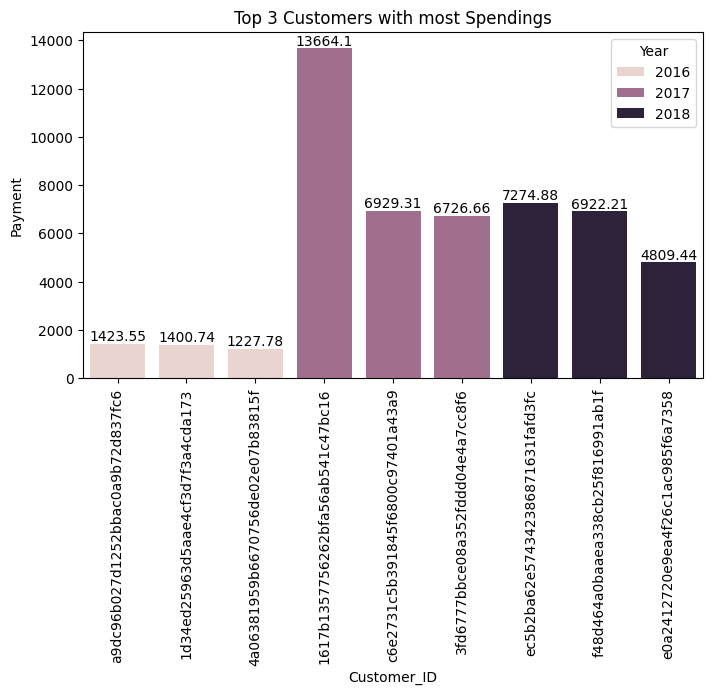

In [27]:
plt.figure(figsize=(8,4.5))
ax = sns.barplot(x = "Customer_ID", y = "Payment", data = df, hue = "Year")

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.title("Top 3 Customers with most Spendings")
plt.xticks(rotation = 90)
plt.show()